In [ ]:
!pip install -U fortran-magic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.4 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

# Dictionaries

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [ ]:
%%time

matmul(a, b)

CPU times: user 16 µs, sys: 0 ns, total: 16 µs
Wall time: 20.3 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

***My own example 0 - cpu info***

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi its
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes

***My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)***

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for _ in range(cols_out)] for _ in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):  # <-- Cambio
                out[i][j] += A[i][k] * B[k][j]
    return out

***My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)***

In [ ]:
try:
    result = matmul(a, b)
    print(result)
except IndexError as e:
    print("Error:", e)

Error: list index out of range


***My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)***

In [ ]:
print("A columns:", len(a[0]))
print("B rows:", len(b))
print("Compatible?" , len(a[0]) == len(b))

A columns: 3
B rows: 2
Compatible? False


***My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)***

In [ ]:
if len(a[0]) != len(b):
    print("Cannot multiply: number of columns in A != number of rows in B")
else:
    print(matmul(a, b))

***My own example 5 - Deifining A and B that are compatible for multiplcation***

In [ ]:
A = [[10, 11, 12],
     [13, 14, 15]]

B = [[16, 17],
     [18, 19],
     [20, 21]]

print("A:", A)
print("B:", B)

A: [[10, 11, 12], [13, 14, 15]]
B: [[16, 17], [18, 19], [20, 21]]


***My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.***

In [ ]:
def matmul(A, B):
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for _ in range(cols_out)] for _ in range(rows_out)]
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):  # columnas de A
                out[i][j] += A[i][k] * B[k][j]
    return out

result = matmul(A, B)
print("Result of A x B:")
for row in result:
    print(row)

Result of A x B:
[598, 631]
[760, 802]


In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

-0.7334916139358563

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.898419911161167, 0.39447208211671503, 0.4010163433181565],
 [0.02659833551548152, 0.4602308432409854, 0.690134030235504]]

***My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time***

In [ ]:
import random
import time

randa = [[random.random() for _ in range(100)] for _ in range(600)]
randb = [[random.random() for _ in range(600)] for _ in range(100)]

def matmul(A, B):
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for _ in range(cols_out)] for _ in range(rows_out)]
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

times = []
for _ in range(10):
    start = time.time()
    matmul(randa, randb)
    end = time.time()
    times.append(end - start)

avg_time_python = sum(times) / len(times)
print("Average execution time (Python):", avg_time_python, "seconds")

Average execution time (Python): 5.902197742462159 seconds


***My own example 8 - Creating the average execution time data frame and adding Python's average execution time***

In [ ]:
import pandas as pd

dataframe_times = pd.DataFrame({'Method': ['Python'], 'Avg_Time': [avg_time_python]})
dataframe_times

,Method,Avg_Time
0,Python,5.902198


***My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time***

In [ ]:
import numpy as np

randa_np = np.random.rand(600, 100)
randb_np = np.random.rand(100, 600)

times_np = []
for _ in range(10):
    start = time.time()
    np.dot(randa_np, randb_np)
    end = time.time()
    times_np.append(end - start)

avg_time_numpy = sum(times_np) / len(times_np)

dataframe_times.loc[len(dataframe_times)] = {'Method': 'NumPy', 'Avg_Time': avg_time_numpy}
dataframe_times

,Method,Avg_Time
0,Python,5.902198
1,NumPy,0.002857


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 5.99 s, sys: 4 ms, total: 5.99 s
Wall time: 5.99 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 6.95 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 181 µs


333328333350000.0

In [ ]:
!apt-get update -y
!apt-get install -y gfortran ninja-build
!pip install meson fortran-magic
%load_ext fortranmagic


Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://cli.github.com/packages stable InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

***My own example 10 - Deifining A (2x2)  and B (2x2)***

In [ ]:
A = [[10, 11],
     [12, 13]]

B = [[14, 15],
     [16, 17]]

***My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices***

In [ ]:
%%fortran
subroutine matmul_2x2(A, B, C)
    double precision, intent(in) :: A(2,2), B(2,2)
    double precision, intent(out) :: C(2,2)
    integer :: i,j,k

    do i = 1, 2
        do j = 1, 2
            C(i,j) = 0
            do k = 1, 2
                C(i,j) = C(i,j) + A(i,k) * B(k,j)
            end do
        end do
    end do
end subroutine

***My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices***

In [ ]:
%%fortran
subroutine matmul_2x2(A, B, C)
    double precision, intent(in) :: A(2,2), B(2,2)
    double precision, intent(out) :: C(2,2)
    integer :: i, j, k

    do i = 1, 2
        do j = 1, 2
            C(i,j) = 0
            do k = 1, 2
                C(i,j) = C(i,j) + A(i,k) * B(k,j)
            end do
        end do
    end do
end subroutine matmul_2x2


In [ ]:
import numpy as np

A = np.array([[1, 2],
              [3, 4]], dtype=np.float64)

B = np.array([[5, 6],
              [7, 8]], dtype=np.float64)

# Just pass A and B, Fortran will return C
C = matmul_2x2(A, B)

print("Result of Fortran 2x2 multiplication:")
print(C)


Result of Fortran 2x2 multiplication:
[[19. 22.]
 [43. 50.]]


***My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices***

In [ ]:
%%fortran
subroutine matmul_large(A, B, C, m, n, p)
    integer, intent(in) :: m, n, p
    double precision, intent(in) :: A(m,n), B(n,p)
    double precision, intent(out) :: C(m,p)
    integer :: i,j,k

    do i = 1, m
        do j = 1, p
            C(i,j) = 0
            do k = 1, n
                C(i,j) = C(i,j) + A(i,k) * B(k,j)
            end do
        end do
    end do
end subroutine

***My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices***

In [ ]:

randa_np = np.random.rand(600, 100)
randb_np = np.random.rand(100, 600)

C_large = matmul_large(randa_np, randb_np, 600, 100, 600)
print("Result shape:", C_large.shape)


Result shape: (600, 600)


***My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame***

In [ ]:
import time

A = np.random.rand(600, 100)
B = np.random.rand(100, 600)

times = []
for _ in range(10):
    start = time.time()
    C = matmul_large(A, B, 600, 100, 600)
    end = time.time()
    times.append(end - start)

avg_time = np.mean(times)

df = pd.DataFrame([{
    "Method": "Fortran matmul_large",
    "Matrix A shape": A.shape,
    "Matrix B shape": B.shape,
    "Runs": 10,
    "Average Time (s)": avg_time
}])

print(df)


                 Method Matrix A shape Matrix B shape  Runs  Average Time (s)
0  Fortran matmul_large     (600, 100)     (100, 600)    10          0.050035


***My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices***

In [ ]:
%%fortran
subroutine matmul_large_10x(A, B, C, m, n, p)
    integer, intent(in) :: m, n, p
    double precision, intent(in) :: A(m,n), B(n,p)
    double precision, intent(out) :: C(m,p)
    integer :: i,j,k, t

    do t = 1, 10
        do i = 1, m
            do j = 1, p
                C(i,j) = 0
                do k = 1, n
                    C(i,j) = C(i,j) + A(i,k) * B(k,j)
                end do
            end do
        end do
    end do
end subroutine

***My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices***

In [ ]:

randa_np = np.random.rand(600, 100)
randb_np = np.random.rand(100, 600)

matmul_large_10x(randa_np, randb_np, 600, 100, 600)
print("Executed Fortran multiplication 10 times.")

Executed Fortran multiplication 10 times.


***My own example 18 - Adding Fortran average execution time to the data frame***

In [ ]:
start = time.time()
matmul_large_10x(A, B, 600, 100, 600)
end = time.time()

avg_time = (end - start) / 10.0

df = pd.DataFrame([{
    "Method": "Fortran matmul_large_10x",
    "Matrix A shape": A.shape,
    "Matrix B shape": B.shape,
    "Runs": 10,
    "Average Time (s)": avg_time
}])

print(df)


                     Method Matrix A shape Matrix B shape  Runs  \
0  Fortran matmul_large_10x     (600, 100)     (100, 600)    10   

   Average Time (s)  
0           0.05716  


***My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices***

In [ ]:
%%writefile matmul_10x.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define M 600
#define N 100
#define P 600

void matmul(double A[M][N], double B[N][P], double C[M][P]) {
    int i, j, k;
    for (i = 0; i < M; i++) {
        for (j = 0; j < P; j++) {
            C[i][j] = 0.0;
            for (k = 0; k < N; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

int main() {
    static double A[M][N], B[N][P], C[M][P];
    int i, j, r;

    srand(0);
    for (i = 0; i < M; i++)
        for (j = 0; j < N; j++)
            A[i][j] = (double)rand() / RAND_MAX;

    for (i = 0; i < N; i++)
        for (j = 0; j < P; j++)
            B[i][j] = (double)rand() / RAND_MAX;

    clock_t start = clock();

    for (r = 0; r < 10; r++) {
        matmul(A, B, C);
    }

    clock_t end = clock();
    double time_spent = (double)(end - start) / CLOCKS_PER_SEC;

    printf("Executed C multiplication 10 times in %f seconds\n", time_spent);
    return 0;
}


Writing matmul_10x.c


***My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices***

In [ ]:
!gcc matmul_10x.c -O2 -o matmul_10x
!./matmul_10x


Executed C multiplication 10 times in 0.522667 seconds


***My own example 21 - Adding c average execution time to the data frame***

In [ ]:
import subprocess
import re

# Run the compiled C program and capture its output
result = subprocess.run(["./matmul_10x"], capture_output=True, text=True)
output = result.stdout.strip()

# Extract the number from the output string
match = re.search(r"in ([0-9.]+) seconds", output)
if match:
    total_time = float(match.group(1))
    avg_time = total_time / 10.0

    df_c = pd.DataFrame([{
        "Method": "C matmul_10x",
        "Matrix A shape": (600, 100),
        "Matrix B shape": (100, 600),
        "Runs": 10,
        "Average Time (s)": avg_time
    }])

    print(df_c)
else:
    print("Could not parse output:", output)


         Method Matrix A shape Matrix B shape  Runs  Average Time (s)
0  C matmul_10x     (600, 100)     (100, 600)    10          0.067468


***My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices***

In [ ]:
%%writefile matmul_10x.cpp
#include <iostream>
#include <vector>
#include <cstdlib>
#include <ctime>
#include <chrono>

const int M = 600;
const int N = 100;
const int P = 600;

void matmul(const std::vector<std::vector<double>>& A,
            const std::vector<std::vector<double>>& B,
            std::vector<std::vector<double>>& C) {
    for (int i = 0; i < M; i++) {
        for (int j = 0; j < P; j++) {
            C[i][j] = 0.0;
            for (int k = 0; k < N; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

int main() {
    std::srand(0);

    std::vector<std::vector<double>> A(M, std::vector<double>(N));
    std::vector<std::vector<double>> B(N, std::vector<double>(P));
    std::vector<std::vector<double>> C(M, std::vector<double>(P));

    for (int i = 0; i < M; i++)
        for (int j = 0; j < N; j++)
            A[i][j] = (double)std::rand() / RAND_MAX;

    for (int i = 0; i < N; i++)
        for (int j = 0; j < P; j++)
            B[i][j] = (double)std::rand() / RAND_MAX;

    auto start = std::chrono::high_resolution_clock::now();

    for (int r = 0; r < 10; r++) {
        matmul(A, B, C);
    }

    auto end = std::chrono::high_resolution_clock::now();
    std::chrono::duration<double> elapsed = end - start;

    std::cout << "Executed C++ multiplication 10 times in "
              << elapsed.count() << " seconds" << std::endl;

    return 0;
}


Writing matmul_10x.cpp


***My own example 23 - Running the C++ program that mutiplies 10 times A (600x100) and  B (100x600) matrices***

In [ ]:
!g++ matmul_10x.cpp -O2 -o matmul_10x_cpp
!./matmul_10x_cpp


Executed C++ multiplication 10 times in 0.524193 seconds


***My own example 24 - Adding C++ average execution time to the data frame***

In [ ]:
result = subprocess.run(["./matmul_10x_cpp"], capture_output=True, text=True)
output = result.stdout.strip()

match = re.search(r"in ([0-9.]+) seconds", output)
if match:
    total_time = float(match.group(1))
    avg_time = total_time / 10.0

    df_cpp = pd.DataFrame([{
        "Method": "C++ matmul_10x",
        "Matrix A shape": (600, 100),
        "Matrix B shape": (100, 600),
        "Runs": 10,
        "Average Time (s)": avg_time
    }])

    print(df_cpp)
else:
    print("Could not parse output:", output)


           Method Matrix A shape Matrix B shape  Runs  Average Time (s)
0  C++ matmul_10x     (600, 100)     (100, 600)    10          0.064023


***My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices***

In [ ]:
%%writefile Matmul10x.java
public class Matmul10x {
    static final int M = 600;
    static final int N = 100;
    static final int P = 600;

    public static void matmul(double[][] A, double[][] B, double[][] C) {
        for (int i = 0; i < M; i++) {
            for (int j = 0; j < P; j++) {
                C[i][j] = 0.0;
                for (int k = 0; k < N; k++) {
                    C[i][j] += A[i][k] * B[k][j];
                }
            }
        }
    }

    public static void main(String[] args) {
        double[][] A = new double[M][N];
        double[][] B = new double[N][P];
        double[][] C = new double[M][P];

        java.util.Random rand = new java.util.Random(0);

        for (int i = 0; i < M; i++)
            for (int j = 0; j < N; j++)
                A[i][j] = rand.nextDouble();

        for (int i = 0; i < N; i++)
            for (int j = 0; j < P; j++)
                B[i][j] = rand.nextDouble();

        long start = System.nanoTime();

        for (int r = 0; r < 10; r++) {
            matmul(A, B, C);
        }

        long end = System.nanoTime();
        double timeSeconds = (end - start) / 1.0e9;

        System.out.println("Executed Java multiplication 10 times in " + timeSeconds + " seconds");
    }
}


Writing Matmul10x.java


In [ ]:
!javac Matmul10x.java


***My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices***

In [ ]:
!java Matmul10x


Executed Java multiplication 10 times in 0.897766615 seconds


***My own example 27 - Adding Java average execution time to the data frame***

In [ ]:
result = subprocess.run(["java", "Matmul10x"], capture_output=True, text=True)
output = result.stdout.strip()

match = re.search(r"in ([0-9.]+) seconds", output)
if match:
    total_time = float(match.group(1))
    avg_time = total_time / 10.0

    df_java = pd.DataFrame([{
        "Method": "Java Matmul10x",
        "Matrix A shape": (600, 100),
        "Matrix B shape": (100, 600),
        "Runs": 10,
        "Average Time (s)": avg_time
    }])

    print(df_java)
else:
    print("Could not parse output:", output)


           Method Matrix A shape Matrix B shape  Runs  Average Time (s)
0  Java Matmul10x     (600, 100)     (100, 600)    10          0.090407


***My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices***

In [ ]:
%%writefile matmul_10x.js
function createMatrix(rows, cols) {
  const mat = new Array(rows);
  for (let i = 0; i < rows; i++) {
    mat[i] = new Array(cols);
    for (let j = 0; j < cols; j++) {
      mat[i][j] = Math.random();
    }
  }
  return mat;
}

function matmul(A, B, C, M, N, P) {
  for (let i = 0; i < M; i++) {
    for (let j = 0; j < P; j++) {
      let sum = 0.0;
      for (let k = 0; k < N; k++) {
        sum += A[i][k] * B[k][j];
      }
      C[i][j] = sum;
    }
  }
}

const M = 600, N = 100, P = 600;
const A = createMatrix(M, N);
const B = createMatrix(N, P);
const C = createMatrix(M, P);

const start = Date.now();
for (let r = 0; r < 10; r++) {
  matmul(A, B, C, M, N, P);
}
const end = Date.now();

const timeSeconds = (end - start) / 1000.0;
console.log(`Executed JavaScript multiplication 10 times in ${timeSeconds} seconds`);


Writing matmul_10x.js


***My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices***

In [ ]:
!node matmul_10x.js


Executed JavaScript multiplication 10 times in 2.165 seconds


***My own example 30 - Adding Javascript average execution time to the data frame***

In [ ]:
result = subprocess.run(["node", "matmul_10x.js"], capture_output=True, text=True)
output = result.stdout.strip()

match = re.search(r"in ([0-9.]+) seconds", output)
if match:
    total_time = float(match.group(1))
    avg_time = total_time / 10.0

    df_js = pd.DataFrame([{
        "Method": "JavaScript matmul_10x",
        "Matrix A shape": (600, 100),
        "Matrix B shape": (100, 600),
        "Runs": 10,
        "Average Time (s)": avg_time
    }])

    print(df_js)
else:
    print("Could not parse output:", output)


                  Method Matrix A shape Matrix B shape  Runs  Average Time (s)
0  JavaScript matmul_10x     (600, 100)     (100, 600)    10            0.3218


***My own example 31 - Finding the minimun average esecuiton time in the data frame***

In [ ]:
#DataFrames in one
df_all = pd.concat([df, df_c, df_cpp, df_java, df_js], ignore_index=True)

print("Unified DataFrame:")
print(df_all)


Unified DataFrame:
                     Method Matrix A shape Matrix B shape  Runs  \
0  Fortran matmul_large_10x     (600, 100)     (100, 600)    10   
1              C matmul_10x     (600, 100)     (100, 600)    10   
2            C++ matmul_10x     (600, 100)     (100, 600)    10   
3            Java Matmul10x     (600, 100)     (100, 600)    10   
4     JavaScript matmul_10x     (600, 100)     (100, 600)    10   

   Average Time (s)  
0          0.057160  
1          0.067468  
2          0.064023  
3          0.090407  
4          0.321800  


In [ ]:
 min_row = df_all.loc[df_all["Average Time (s)"].idxmin()]
print("Fastest method:")
print(min_row)


Fastest method:
Method              Fortran matmul_large_10x
Matrix A shape                    (600, 100)
Matrix B shape                    (100, 600)
Runs                                      10
Average Time (s)                     0.05716
Name: 0, dtype: object


***My own example 32 - Adding the Speed factor columne to the data frame***

In [ ]:
slowest = df_all["Average Time (s)"].max()
df_all["Speed factor"] = slowest / df_all["Average Time (s)"]
print(df_all)


                     Method Matrix A shape Matrix B shape  Runs  \
0  Fortran matmul_large_10x     (600, 100)     (100, 600)    10   
1              C matmul_10x     (600, 100)     (100, 600)    10   
2            C++ matmul_10x     (600, 100)     (100, 600)    10   
3            Java Matmul10x     (600, 100)     (100, 600)    10   
4     JavaScript matmul_10x     (600, 100)     (100, 600)    10   

   Average Time (s)  Speed factor  
0          0.057160      5.629774  
1          0.067468      4.769669  
2          0.064023      5.026358  
3          0.090407      3.559446  
4          0.321800      1.000000  


***My own example 33 - Sorting the the data frame by average execution time***

In [ ]:
df_sorted = df_all.sort_values(by="Average Time (s)").reset_index(drop=True)
print("Sorted DataFrame:")
print(df_sorted)


Sorted DataFrame:
                     Method Matrix A shape Matrix B shape  Runs  \
0  Fortran matmul_large_10x     (600, 100)     (100, 600)    10   
1            C++ matmul_10x     (600, 100)     (100, 600)    10   
2              C matmul_10x     (600, 100)     (100, 600)    10   
3            Java Matmul10x     (600, 100)     (100, 600)    10   
4     JavaScript matmul_10x     (600, 100)     (100, 600)    10   

   Average Time (s)  Speed factor  
0          0.057160      5.629774  
1          0.064023      5.026358  
2          0.067468      4.769669  
3          0.090407      3.559446  
4          0.321800      1.000000  


,Language,Average Secs,Speed factor
1,NumPy,0.006613,1.000000
3,Fortran,0.007648,1.156599
2,Fortranmagic,0.014852,2.245952
6,Java,0.076835,11.619354
4,c,0.200000,30.244991
5,C++,0.221157,33.444457
7,Javascript,0.282100,42.660559
0,Python,8.277163,1251.713539


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 408 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 162 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 313 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ],
       [ 2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ],
       [ 3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([ 0.        ,  0.34185385,  0.64251645,  0.86575984,  0.98468459,
        0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([ 0.        ,  0.34185385,  0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([ 0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [ 0.64251645  0.86575984  0.98468459  0.98496101  0.8665558   0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]


array([ 0.        ,  0.98468459,  0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'],
      dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0638195544963331

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

In [ ]:
data.mean(axis=1)

array([  4.5,  14.5,  24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

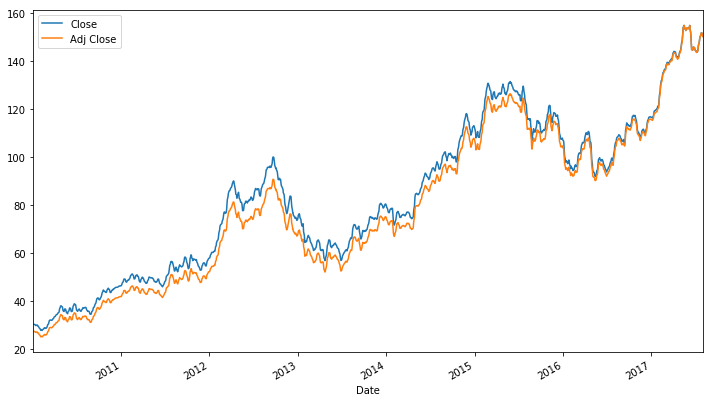

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

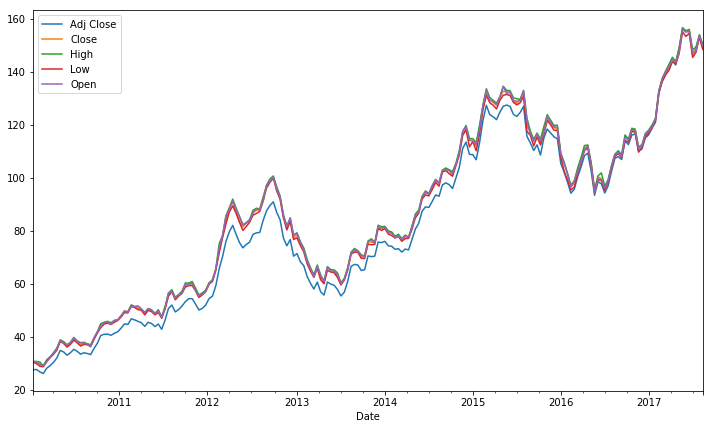

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

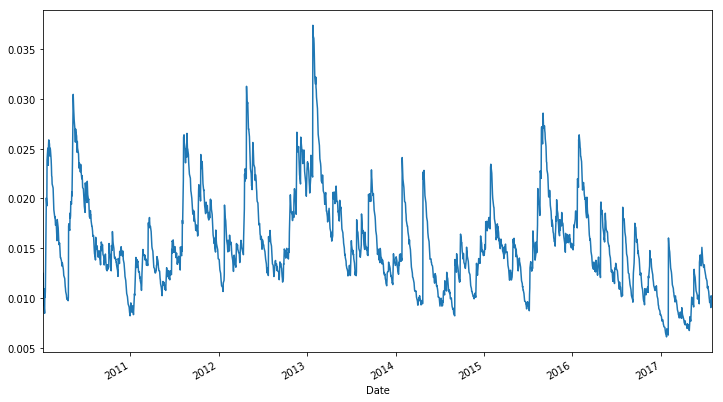

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# MY OWN EXAMPLE ANALISIS: Ejercicio Analisis de Datos (avocado - Gobierno de Colombia)

La base de datos de los aguacates en Estados Unidos fue removida y no se pueden acceder a sus datos, por lo que del repositorio se copió la función

```
read_avocadodata
```
 directamente desde el directorio en GitHub. La funcion descrita abajo ahora lee, organiza y analiza los datos proporcionados por el Gobierno de Colombia, en este caso se ayuda del listado oficial de estudiantes inscritos a los Juegos Intercolegiados en Cartagena en el año 2024, acompañado de cada institucion educativa

In [ ]:
from re import M
import pandas as pd

def read_avocadata(start_date, end_date, cache_loc):
    """
    Lee un CSV local en lugar del HTML no existente del aguacate
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    frame = pd.read_csv(cache_loc)

    return frame

inscritos = read_avocadata("2010-01-04", "2010-01-13", "juegosintercolegiados.csv")
inscritos.head()

,Año,ID,Tipo de Deporte,Deporte,Prueba,Modalidad,Categoría,Departamento,Ciudad,Codigo DANE de la Institución Educativa,Institución Educativa u Organización,Sexo,Nacionalidad,Víctimas del Conflicto,Reconocimiento Étnico,Discapacidad
0,"2,020",01979221JI,INDIVIDUAL,Ajedrez Integrado,No aplica,No aplica,Juvenil,BOLÍVAR,CARTAGENA DE INDIAS,"313,001,000,541",COLEGIO LA ANUNCIACION,Mujer,No Responde,No Responde,No Responde,No Responde
1,"2,020",42590641JI,INDIVIDUAL,Festival Escolar Virtual,No aplica,No aplica,Iniciación,BOLÍVAR,CARTAGENA DE INDIAS,"313,001,800,505",CORPORACION INSTITUCION EDUCATIVA CIENAGA DE L...,Hombre,No Responde,No Responde,No Responde,No Responde
2,"2,020",43313949JI,INDIVIDUAL,Festival Escolar Virtual,No aplica,No aplica,Iniciación,BOLÍVAR,CARTAGENA DE INDIAS,"113,001,003,061",INSTITUCION EDUCATIVA HERMANO ANTONIO RAMOS DE...,Hombre,No Responde,No Responde,No Responde,No Responde
3,"2,020",28049327JI,INDIVIDUAL,Levantamiento de Pesas,No aplica,No aplica,Juvenil,BOLÍVAR,CARTAGENA DE INDIAS,"113,001,002,120",INSTITUCION EDUCATIVA HIJOS DE MARIA,Mujer,No Responde,No Responde,No Responde,No Responde
4,"2,020",07983427JI,INDIVIDUAL,Levantamiento de Pesas,No aplica,No aplica,Juvenil,BOLÍVAR,CARTAGENA DE INDIAS,"313,001,006,701",COLEGIO MILITAR ALMIRANTE COLON,Hombre,No Responde,No Responde,No Responde,No Responde


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
inscritos.dtypes

,0
Año,object
ID,object
Tipo de Deporte,object
Deporte,object
Prueba,object
Modalidad,object
Categoría,object
Departamento,object
Ciudad,object
Codigo DANE de la Institución Educativa,object


In [ ]:
#Mostrar conteo de deportes por sexo
import matplotlib.pyplot as plt
import seaborn as sns

inscritos['Sexo'] = inscritos['Sexo'].str.upper()
conteo_deporte_sexo = inscritos.groupby(['Deporte', 'Sexo']).size().unstack(fill_value=0)
print(conteo_deporte_sexo)

Sexo                      HOMBRE  MUJER
Deporte                                
AJEDREZ INTEGRADO             12      7
ATLETISMO                     12     12
Actividades Subacuáticas      12      9
Ajedrez Integrado            356    113
Atletismo                    959    374
...                          ...    ...
Tenis de Campo                10      2
Tenis de Mesa                187     19
Triatlón                       8      0
VOLEIBOL                       0     16
Voleibol                     189    502

[64 rows x 2 columns]


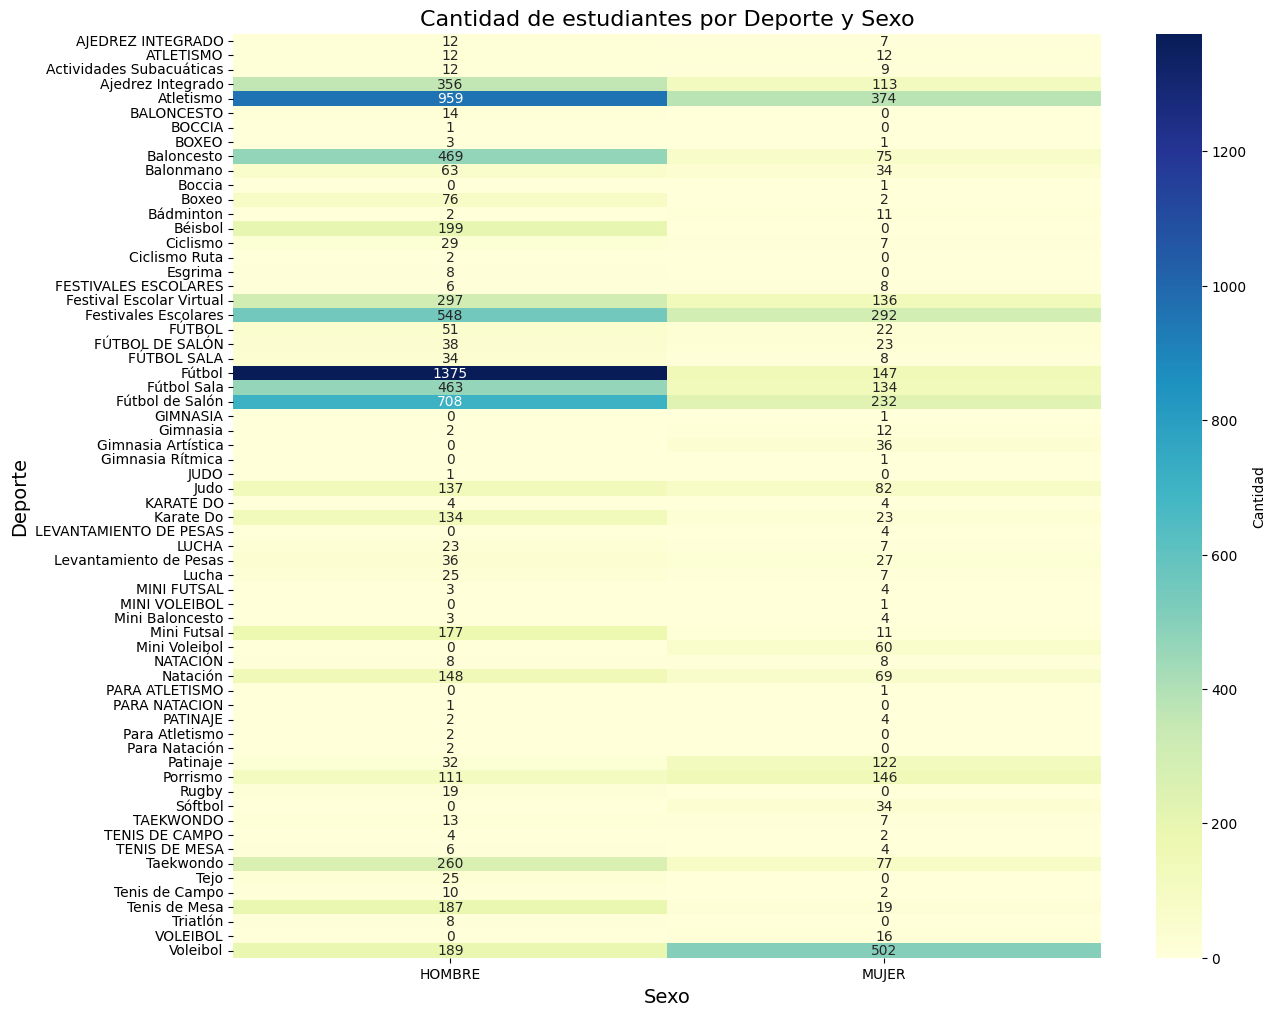

In [ ]:
#Mapa de calor del conteo
plt.figure(figsize=(14, 12))
sns.heatmap(conteo_deporte_sexo, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Cantidad'})
plt.title("Cantidad de estudiantes por Deporte y Sexo", fontsize=16)
plt.ylabel("Deporte", fontsize=14)
plt.xlabel("Sexo", fontsize=14)
plt.show()

/tmp/ipython-input-3920875644.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=inscritos, x="Categoría", order=inscritos['Categoría'].value_counts().index, palette="coolwarm")


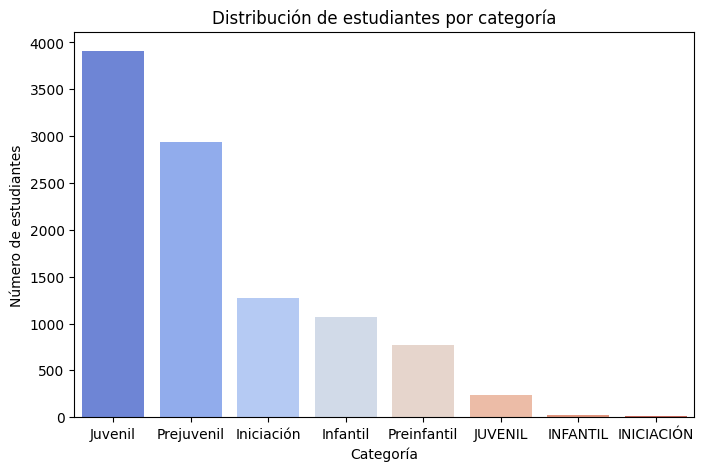

In [ ]:
#Distribución de estudiantes por categoría
plt.figure(figsize=(8,5))
sns.countplot(data=inscritos, x="Categoría", order=inscritos['Categoría'].value_counts().index, palette="coolwarm")
plt.title("Distribución de estudiantes por categoría")
plt.ylabel("Número de estudiantes")
plt.xlabel("Categoría")
plt.show()

/tmp/ipython-input-772769850.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


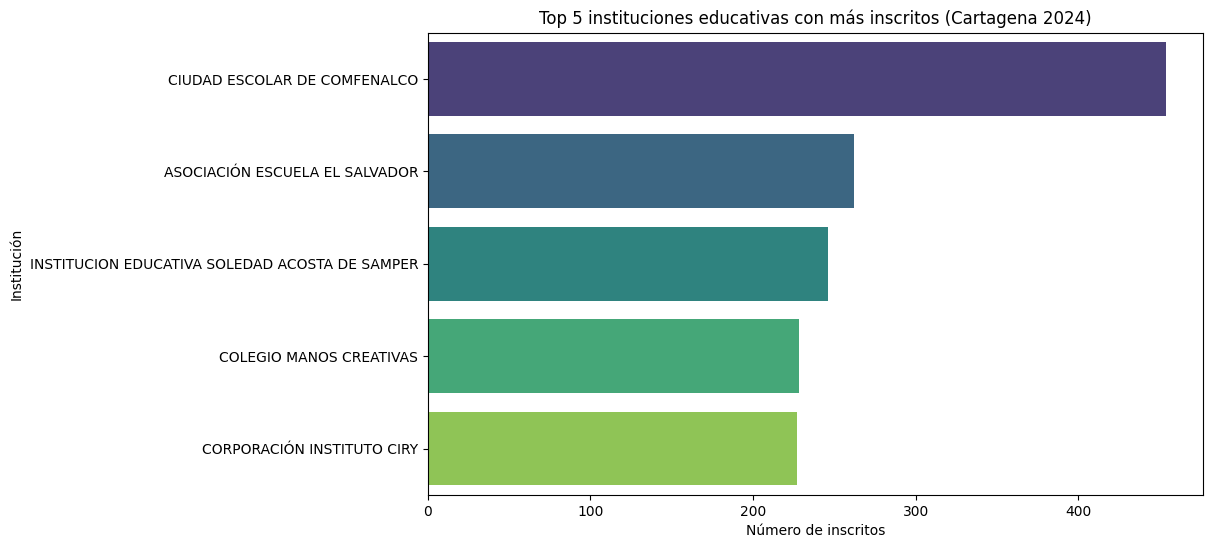

In [ ]:
# Top 5 colegios con más inscritos
top5_colegios = (
    inscritos["Institución Educativa u Organización"]
    .value_counts()
    .head(5)
    .reset_index()
)

top5_colegios.columns = ["Institución", "Inscritos"]

plt.figure(figsize=(10,6))
sns.barplot(
    data=top5_colegios,
    x="Inscritos",
    y="Institución",
    palette="viridis"
)
plt.title("Top 5 instituciones educativas con más inscritos (Cartagena 2024)")
plt.xlabel("Número de inscritos")
plt.ylabel("Institución")
plt.show()


# Thanks!